[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mjwen/chee6397/blob/main/lab/lab4-descriptors.ipynb)

# Lab 4: Descriptors for Molecules and Materials 

This notebook is intended to introduce the use of molecular and materials descriptors to obtain features for machine learning.

We will cover the use of `RDKit` to generate molecular descriptors, and `Matminer` and `Dscrib` to generate materials descriptors.


## Installation 

- To install `RDKit` follow the instructions [here](https://www.rdkit.org/docs/Install.html)
- To install `Matminer` follow the instructions [here](https://hackingmaterials.lbl.gov/matminer/installation.html)
- To install `Dscribe` follow the instructions [here](https://singroup.github.io/dscribe/latest/install.html)

**Optional**

For visualization of the crystals in Jupyter Notebook, install [crystal-toolkit](https://docs.crystaltoolkit.org/introduction.html)

## RDKit 

### Create molecules

In [2]:
# Smiles string of a molecule 
# CC -> CH3-CH3
# CC=O -> CH3-CH=O (= is double bond)
# C1CCCCC1 -> C6H6
benzene_smi = "c1ccccc1"

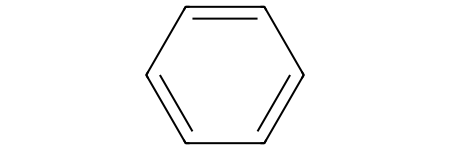

In [3]:
# Rdkit molecule

from rdkit import Chem

benzene = Chem.MolFromSmiles(benzene_smi)

benzene

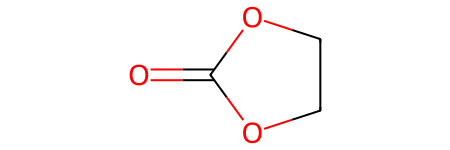

In [4]:
EC_smi = "C1COC(=O)O1"

EC = Chem.MolFromSmiles(EC_smi)

EC

### Morgan/Circular/ECFP fingerprints

In [5]:
from rdkit.Chem import AllChem
 
# Create generator
morgan_generator = AllChem.GetMorganGenerator(radius=2)

# Generate the Morgan fingerprint
morgan_fp = morgan_generator.GetFingerprint(EC)

# Convert the fingerprint to a binary string
fp_binary = morgan_fp.ToBitString()

print("Fingerprint length:", len(fp_binary))

print("First five bits:", fp_binary[:5])

Fingerprint length: 2048
First five bits: 00000


## Crystal composition & structure   

In [6]:
from pymatgen.core import Structure

filename = "./data/NaCl.POSCAR"

NaCl = Structure.from_file(filename)

print(NaCl)

Full Formula (Na4 Cl4)
Reduced Formula: NaCl
abc   :   5.588126   5.588126   5.588126
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Na    0    0    0
  1  Na    0    0.5  0.5
  2  Na    0.5  0    0.5
  3  Na    0.5  0.5  0
  4  Cl    0    0    0.5
  5  Cl    0    0.5  0
  6  Cl    0.5  0    0
  7  Cl    0.5  0.5  0.5


In [7]:
NaCl_comp = NaCl.composition

NaCl_comp

Composition('Na4 Cl4')

### Visualize it

In [8]:
import crystal_toolkit

# NaCl 

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\phatt\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\phatt\AppData\Local\Temp\ipykernel_21856\2645112207.py", line 1, in <module>
    import crystal_toolkit
ModuleNotFoundError: No module named 'crystal_toolkit'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\phatt\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\phatt\AppData\Roaming\Python\Python311\site-packages\IPython\core\ultratb.py", line 1428, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\phatt\AppData\Roaming\Python\

## Matminer 

### Compositional descriptor

In [9]:
from matminer.featurizers.composition import ElementProperty

ep = ElementProperty.from_preset(preset_name="magpie")
features = ep.featurize(NaCl_comp)

# Length of the feature vector
len(features)

c:\Users\phatt\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


132

In [10]:
# First 5 features
features[:5]

[11.0, 17.0, 6.0, 14.0, 3.0]

In [11]:
# What are these features?

labels = ep.feature_labels()

labels[:5]

['MagpieData minimum Number',
 'MagpieData maximum Number',
 'MagpieData range Number',
 'MagpieData mean Number',
 'MagpieData avg_dev Number']

### Structure descriptor 

In [12]:
from matminer.featurizers.structure import RadialDistributionFunction

cutoff = 20 
rdf = RadialDistributionFunction(cutoff=cutoff)

features = rdf.featurize(NaCl)

len(features)

200

In [13]:
features.shape

(200,)

Text(0, 0.5, 'Radial distribution function')

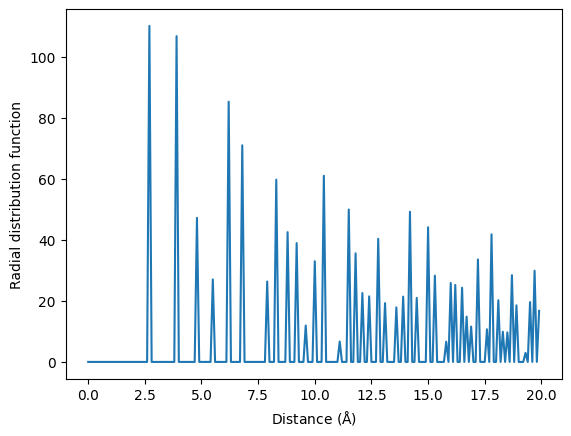

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

X = np.arange(0, cutoff, cutoff/len(features))
Y = features

ax.plot(X, Y)

ax.set_xlabel(r"Distance $(\mathrm{\AA})$")
ax.set_ylabel("Radial distribution function")

## Crystal composition & structure   
 
- ASE (an alternative to pymatgen)

In [15]:
from ase.io import read

NaCl = read("./data/NaCl.POSCAR")

NaCl

Atoms(symbols='Na4Cl4', pbc=True, cell=[[5.588126435439935, 0.0, 3e-16], [9e-16, 5.588126435439935, 3e-16], [0.0, 0.0, 5.588126435439935]])

In [16]:
from ase.visualize import view

view(NaCl, viewer='x3d')

## SOAP Descriptor

In [17]:
from dscribe.descriptors import SOAP

soap = SOAP(r_cut=5, n_max=8, l_max=6, species=["Na", "Cl"], periodic=True)

features = soap.create(NaCl)

# The shape is (n_atoms, n_features)
features.shape

(8, 952)

In [18]:
# The first 10 features for the first atom
features[0][:10]

array([ 0.01150823,  0.05439198,  0.08569168,  0.30573843,  0.00483586,
        0.906287  , -1.43857222,  2.26457369,  0.25707581,  0.40500933])